In [228]:
import os
from glob import glob
import numpy as np

train_data_path = 'dataset/train/'
test_data_path = 'dataset/test/'

In [229]:
def load_folder(path):
    pattern = os.path.join(path, '*.pose.npy')
    pose_paths = glob(pattern)
    result = []
    for pose_path in pose_paths:
        face_path = pose_path.replace('pose', 'face')
        try:
            pose = np.load(pose_path)[0]#[[0, 1, 2, 5, 15, 16, 17, 18]]
            pose = pose.flatten()
            face = np.load(face_path)[0].flatten()
            joined = np.concatenate([face, pose])
            result.append(joined)
        except:
            print(pose_path, 'seems to contain bad data:', np.load(pose_path))
    prev_shape = None
    for x in result:
        prev_shape = x.shape
    return np.stack(result, axis=0)
              
def load_dataset(data_path):
    good_examples_path = os.path.join(data_path, 'Good')
    bad_examples_path = os.path.join(data_path, 'Bad')
    good = load_folder(good_examples_path)
    good_Y = np.ones(good.shape[0])
    bad = load_folder(bad_examples_path)
    bad_Y = np.zeros(bad.shape[0])
    X = np.concatenate([good, bad], axis=0)
    Y = np.concatenate([good_Y, bad_Y], axis=0)
    return X, Y
    
X, Y = load_dataset(train_data_path)
print(X.shape, Y.shape)
X_test, Y_test = load_dataset(test_data_path)
print(X_test.shape, Y_test.shape)

dataset/train/Bad/Meenakshi_2_60.pose.npy seems to contain bad data: 2.0
dataset/train/Bad/Meenakshi_2_61.pose.npy seems to contain bad data: 2.0
(712, 285) (712,)
dataset/test/Bad/Vlad_1_72.pose.npy seems to contain bad data: 2.0
(149, 285) (149,)


In [230]:
import sklearn
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression(max_iter=1000)

In [231]:
model.fit(X, Y)

/Users/vladsobol/study/NYU/classes/DS_GA_1001_Data_Science/DataScienceCourse/ve/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
Y_pred = model.predict(X_test)

In [233]:
import sklearn.metrics
sklearn.metrics.accuracy_score(Y_pred, Y_test)

0.5906040268456376

In [234]:
Y_test.sum() / Y_test.shape[0]

0.47651006711409394

In [235]:
def get_roc_auc(model, x_test, y_test):
    y_pred = model.predict_proba(x_test)[:, 1]
    roc = sklearn.metrics.roc_curve(y_test, y_pred)
    auc = sklearn.metrics.auc(roc[0], roc[1])
    return roc, auc

In [236]:
roc, auc = get_roc_auc(model, X_test, Y_test)

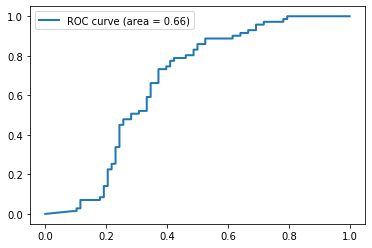

In [237]:
import matplotlib.pyplot as plt

plt.plot(roc[0], roc[1],
         lw=2, label='ROC curve (area = %0.2f)' % (auc))
plt.legend()